In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
lc_df = pd.read_csv('./datasets/lc_2016_2017.csv',low_memory=False)

# 🎀Information

- **emp_length**: 고용 기간
- **home_ownership**: 주택 소유 상태
- **annual_inc**: 연간 소득
- **verification_status**: 소득 확인 상태
- **issue_d**: 대출 발행 일자
- **loan_status**: 대출 상태
- **pymnt_plan**: 상환 계획 여부
- **desc**: 설명
- **purpose**: 대출 목적
- **title**: 대출 제목
- **zip_code**: 우편 번호 (첫 3자리)
- **addr_state**: 주소 주(미국 주)
- **dti**: 부채 비율
- **delinq_2yrs**: 최근 2년간 연체 횟수
- **earliest_cr_line**: 최초 신용 한도 개설 날짜
- **inq_last_6mths**: 최근 6개월간 조회 횟수
- **mths_since_last_delinq**: 최근 연체 후 경과한 개월 수
- **mths_since_last_record**: 최근 기록 후 경과한 개월 수
- **open_acc**: 개설된 신용 한도 수
- **pub_rec**: 공적 기록 수
- **revol_bal**: 회전 잔액
- **revol_util**: 회전 신용 한도 사용률
- **total_acc**: 총 신용 한도 수
- **initial_list_status**: 초기 목록 상태
- **out_prncp**: 남은 원금
- **out_prncp_inv**: 남은 총 원금
- **total_pymnt**: 총 지급액
- **total_pymnt_inv**: 총 지급액 (투자자에게)
- **total_rec_prncp**: 총 원금 상환액
- **total_rec_int**: 총 이자 수익
- **total_rec_late_fee**: 총 연체료 수수료
- **recoveries**: 회수액
- **collection_recovery_fee**: 회수 수수료
- **last_pymnt_d**: 최근 지불 날짜
- **last_pymnt_amnt**: 최근 지불 금액
- **next_pymnt_d**: 다음 지불 날짜
- **last_credit_pull_d**: 최근 신용 조회 날짜
- **collections_12_mths_ex_med**: 최근 12개월 동안 의료 제외 체납 회수
- **mths_since_last_major_derog**: 최근 주요 손상 후 경과한 개월 수
- **policy_code**: 정책 코드
- **application_type**: 신청 유형
- **annual_inc_joint**: 연간 소득 (공동 신청자)
- **dti_joint**: 부채 비율 (공동 신청자)
- **verification_status_joint**: 소득 확인 상태 (공동 신청자)
- **acc_now_delinq**: 현재 연체 수
- **tot_coll_amt**: 총 집합 금액
- **tot_cur_bal**: 총 현재 잔액
- **open_acc_6m**: 6개월 동안 개설된 신용 한도 수
- **open_il_12m**: 12개월 동안 개설된 당좌 계좌 수
- **open_il_24m**: 24개월 동안 개설된 당좌 계좌 수
- **mths_since_rcnt_il**: 최근 당좌 계좌 개설 후 경과한 개월 수
- **total_bal_il**: 총 당좌 계좌 잔액
- **il_util**: 당좌 계좌 사용률
- **open_rv_12m**: 12개월 동안 개설된 회전 계좌 수
- **open_rv_24m**: 24개월 동안 개설된 회전 계좌 수
- **max_bal_bc**: 최대 잔액 회전 계좌
- **all_util**: 전체 잔액 회전 계좌 사용률

In [2]:
lc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759338 entries, 0 to 759337
Data columns (total 72 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           759338 non-null  int64  
 1   member_id                    0 non-null       float64
 2   loan_amnt                    759338 non-null  int64  
 3   funded_amnt                  759338 non-null  int64  
 4   funded_amnt_inv              759338 non-null  float64
 5   term                         759338 non-null  object 
 6   int_rate                     759338 non-null  float64
 7   installment                  759338 non-null  float64
 8   grade                        759338 non-null  object 
 9   sub_grade                    759338 non-null  object 
 10  emp_title                    708368 non-null  object 
 11  emp_length                   708975 non-null  object 
 12  home_ownership               759338 non-null  object 
 13 

## ⚒️feature 제거
### 🧨1차 제거 칼럼
- pymnt_plan 대출상환계획
- title: 개인이 작성한 대출이유 제목
- zipcode : 앞 세자리만 있음
- policy_code: 정책코드
### 🧨 2차 제거 칼럼
- 투자자에 대한 feature 제거
- funded_amnt_inv: 투자자에게 제공된 대출 금액
- total_pymnt_inv: 투자자에게 제공된 총 지불액  
- out_prncp_inv: 투자자에게 제공된 원금 잔액  
- collection_recovery_fee: 회수 수수료
- initial_list_status: 투자자 제공목록
### 🧨3차 제거 칼럼
- 공동 대출에 대한 feature 제거
- 공동 대출을 진행한 열 삭제
- annual_inc_joint: 공동 대출 신청자의 연간 소득
- application_type: 대출 신청 유형 (개별 또는 공동)
- dti_joint: 공동 대출 신청자의 총 월 소득 대비 총 월 부채 정도
- verification_status_joint: 공동 대출 신청자의 소득 및 직업 확인 상태
### 🧨 비 주요/ 중복 칼럼 삭제
- mths_since_last_record: 최근 기록 이후 개월 수
- mths_since_rcnt_il: 최근 할부 대출 이용 이후 개월 
- open_acc: 최근 개설된 신용 계좌 수
- open_acc_6m: 지난 6개월 동안 개설된 신용 계좌-  수
- open_il_12m: 지난 12개월 동안 개설된 할부 대- verification_status: 소득 및 직업 확인 상태
- open_rv_12m: 지난 12개월 동안 개설된 회전 신용 계좌 수
- mths_since_rcnt_il: 최근 할부 대출 이용 이후 개월 수
- mths_since_last_record: 최근 기록 이후 개월 수
- inq_last_6mths: 지난 6개월 동안 조회 횟수
- earliest_cr_line: 최초 신용 카드 개설일
- collections_12_mths_ex_med: 최근 12개월 동안 의료 기반 청구 수집 여부
- next_pymnt_d: 다음 지불 날짜

In [3]:
# 필요한 칼럼명 변경
lc_df = lc_df.rename(columns={"loan_amnt": "loan_amount", "funded_amnt": "funded_amount", "funded_amnt_inv": "investor_funds",
                       "int_rate": "interest_rate", "annual_inc": "annual_income","addr_state":"state"})

# 필요없는 칼럼 삭제
lc_df = lc_df.drop(columns = ['pymnt_plan','title','zip_code','policy_code','member_id','desc',\
         'total_pymnt_inv','out_prncp_inv','collection_recovery_fee',\
         'initial_list_status','annual_inc_joint','dti_joint',\
         'verification_status_joint'])

In [4]:
# 공동대출 항목 확인
lc_df['application_type'].value_counts()
# applicatiion_type이 Joint App인 열 삭제
lc_df =lc_df[lc_df['application_type'] != 'Joint App']
lc_df = lc_df.drop(columns = ['application_type'])

In [5]:
#비 주요/ 중복 칼럼 삭제
lc_df = lc_df.drop(columns=['mths_since_last_record','mths_since_rcnt_il'\
                            ,'open_acc','open_acc_6m', 'open_il_12m','verification_status'\
                            ,'open_rv_12m','mths_since_rcnt_il','mths_since_last_record'\
                            ,'inq_last_6mths','earliest_cr_line'\
                            ,'collections_12_mths_ex_med','next_pymnt_d'])

## ⚒️결측치처리

In [6]:
missing_values = lc_df.isna().sum()
missing_values = missing_values[missing_values != 0]
missing_values

emp_title                       46872
emp_length                      46262
mths_since_last_delinq         345608
revol_util                        474
last_pymnt_d                      915
last_credit_pull_d                 18
mths_since_last_major_derog    518524
open_il_24m                        61
total_bal_il                       61
il_util                         95628
open_rv_24m                        61
max_bal_bc                         61
all_util                          105
inq_fi                             61
total_cu_tl                        62
inq_last_12m                       62
dtype: int64

### 🧨결측치 대체 항목
- emp_title: 직장명을 입력하지 않은 경우 None => unknown
- emp_length: 직장 근속연수 None => 0
- mths_since_last_delinq: 마지막 연체 이후로 지난 날짜 None => 0
- revol_util: 행 삭제
- open_il_24m, total_bal_il, open_rv_24m, max_bal_bc,inq_fi, total_cu_tl, inq_last_12m: 공통 결측값, 행 삭제
- il_util : total_bal_il로 계산
- mths_since_last_major_derog : 마지막 주요 법정 기록 후 개월 수 None => 0
- last_pymnt_d, last_credit_pull_d: 행삭제 

In [7]:
lc_df.loc[:, 'emp_title'].fillna('unknown', inplace=True)

lc_df.loc[:, 'emp_length'].fillna(0, inplace=True)

lc_df.loc[:, 'mths_since_last_delinq'].fillna(0, inplace=True)

lc_df = lc_df.copy()

lc_df.loc[:, 'mths_since_last_major_derog'].fillna(0, inplace=True)
lc_df = lc_df.dropna(subset=['open_il_24m', 'total_bal_il', 'open_rv_24m'\
                     , 'max_bal_bc','inq_fi', 'total_cu_tl', 'inq_last_12m','revol_util' ])
# 결측값을 가진 행 선택
missing_il_util_rows = lc_df['il_util'].isnull()

# 결측값을 가진 행에 대해 il_util 계산하여 대입
lc_df.loc[missing_il_util_rows\
            , 'il_util'] = (lc_df.loc[missing_il_util_rows,\
                                        'total_bal_il'] / lc_df['total_bal_il'].max()) * 100

In [8]:
lc_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 724799 entries, 0 to 759290
Data columns (total 47 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           724799 non-null  int64  
 1   loan_amount                  724799 non-null  int64  
 2   funded_amount                724799 non-null  int64  
 3   investor_funds               724799 non-null  float64
 4   term                         724799 non-null  object 
 5   interest_rate                724799 non-null  float64
 6   installment                  724799 non-null  float64
 7   grade                        724799 non-null  object 
 8   sub_grade                    724799 non-null  object 
 9   emp_title                    724799 non-null  object 
 10  emp_length                   724799 non-null  object 
 11  home_ownership               724799 non-null  object 
 12  annual_income                724799 non-null  float64
 13  issu

### 💡데이터 분석

- 1️⃣ 각 주별 평균 연간소득 비교
    - 평균 소득, 중위 소득, 고소득, 저소득 판별 
- 2️⃣ 소득별 대출상태, 각 주 별 이자율, 대출 상태, 대출 규모
    - 소득 분위 별 대출 상태
    - 소득 분위 별 이자율
    - 각 등급별 이자율
    - 각 등급별 대출 상태
    - 각 등급별 대출 규모
    - 소득 분위 별 대출 규모 
- 3️⃣ 대출 등급과 상환 여부, 각 주별 연체율
    - 각 소득 구간 별 연체율
    - 각 소득 구간 별 대출 등급
- 4️⃣ 주별 리볼빙 및 할부 대출 이용률 비교, 대출 상환과 회수율  
    - 각 소득 구간 별 리볼빙 및 할부대출 이용률
    - 대출 상환률

- 5️⃣ 각 주별 평균 연간소득 비교
- 6️⃣ 각 주별 주택 소유형태와 이에따른 부채 비율
    - 각 소득 구간 별 주택 소유 형태
    - 각 소득 구간 별 부채비율

-7️⃣ 각 주별 평균 연간소득 비교
- 8️⃣등급 분포 확인
- 9️⃣ 신용상태 비교, 신용 리스크가 높은 지역과 낮은 지역

결론 = 연간 소득에 대한 대출과 연체 신용 상태


### 지급 요소 간 연관성 파악

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Total committed by Investors')

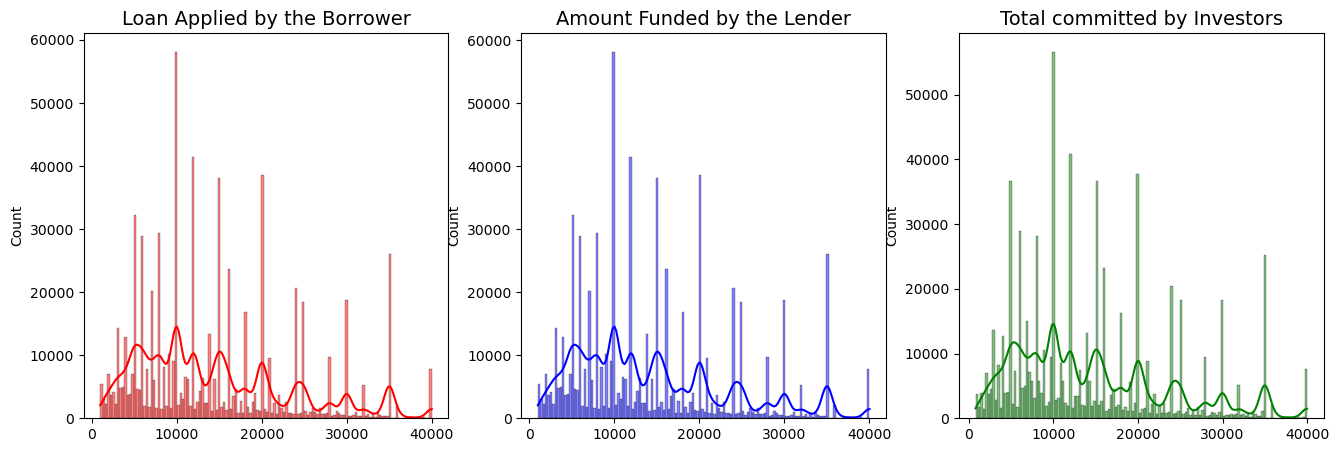

In [9]:
fig, ax = plt.subplots(1, 3, figsize=(16,5))

loan_amount = lc_df["loan_amount"].values
funded_amount = lc_df["funded_amount"].values
investor_funds = lc_df["investor_funds"].values


sns.histplot(loan_amount, ax=ax[0], color="r",kde=True)
ax[0].set_title("Loan Applied by the Borrower", fontsize=14)
sns.histplot(funded_amount, ax=ax[1], color="b",kde=True)
ax[1].set_title("Amount Funded by the Lender", fontsize=14)
sns.histplot(investor_funds, ax=ax[2], color="g",kde=True)
ax[2].set_title("Total committed by Investors", fontsize=14)

### 각 state 별 데이터확인

In [10]:
import pandas as pd

def calculate_and_sort_income(df, column_name):
    income_df = df.groupby('state')[column_name].agg(['mean', 'median', 'max', 'min']).reset_index()
    income_df = income_df.sort_values(by='mean', ascending=False)
    return income_df

# 주별 소득에 대한 데이터프레임 생성 및 정렬
lc_an_income_df = calculate_and_sort_income(lc_df, 'annual_income')
lc_an_income_df.head()

,state,mean,median,max,min
7,DC,99885.282211,86700.0,1000000.0,9156.0
30,NJ,95582.401486,75000.0,110000000.0,7500.0
44,VA,92032.232727,75000.0,61000000.0,6168.0
19,MD,89156.260087,79000.0,6693021.0,8796.0
6,CT,88968.743173,72000.0,5300000.0,8243.0


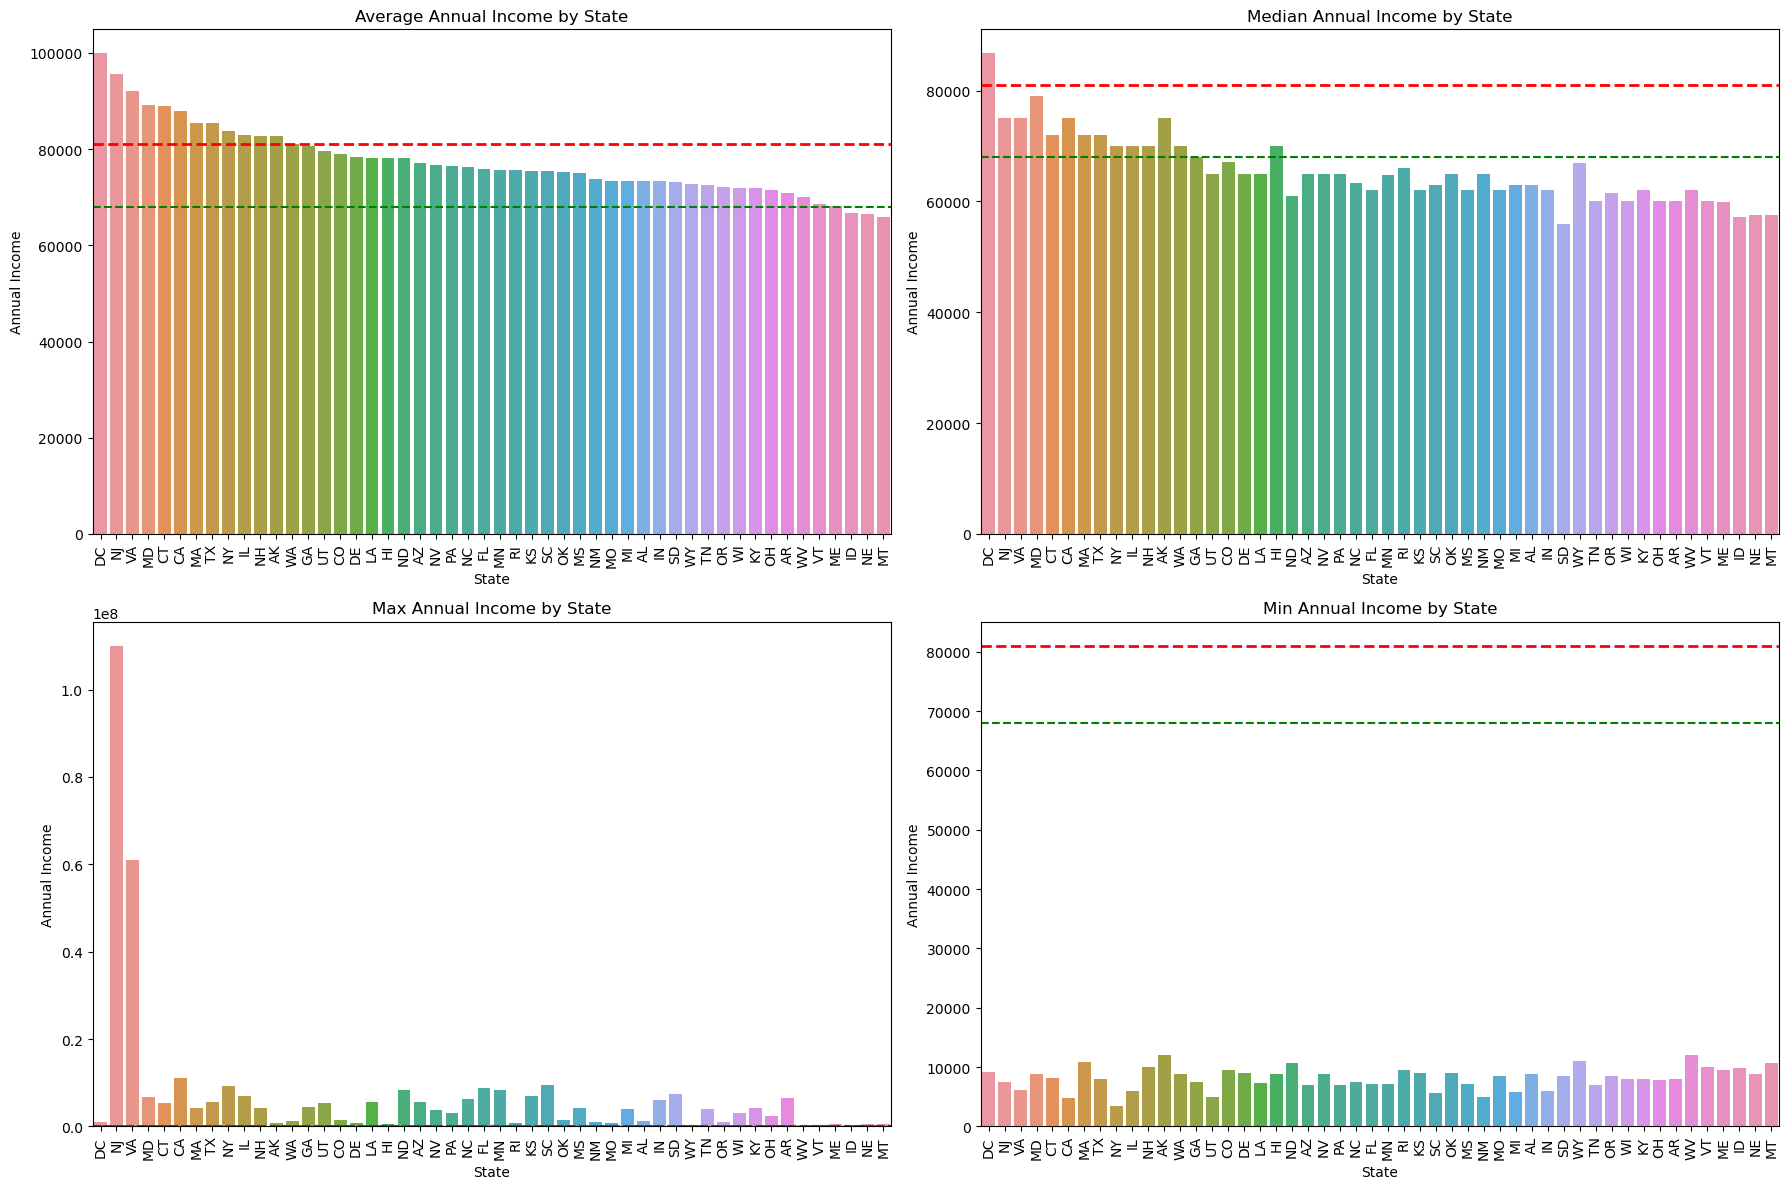

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def calculate_and_sort_income(df, column_name):
    income_df = df.groupby('state')[column_name].agg(['mean', 'median', 'max', 'min']).reset_index()
    income_df = income_df.sort_values(by='mean', ascending=False)
    return income_df

# 주별 소득에 대한 데이터프레임 생성 및 정렬
lc_an_income_df = calculate_and_sort_income(lc_df, 'annual_income')

# 전체 평균 소득 계산
total_mean_income = lc_df['annual_income'].mean()
total_median_income = lc_df['annual_income'].median()
# 그래프 생성
fig, axs = plt.subplots(2, 2, figsize=(18, 12))

# 그래프 타이틀
graph_titles = ['Average Annual Income by State', 'Median Annual Income by State',
                'Max Annual Income by State', 'Min Annual Income by State']

# 반복문을 사용하여 그래프 그리기
for i, (column_name, title) in enumerate(zip(['mean', 'median', 'max', 'min'], graph_titles)):
    sns.barplot(data=lc_an_income_df, x='state', y=column_name, ax=axs[i // 2, i % 2])
    axs[i // 2, i % 2].set_title(title)
    axs[i // 2, i % 2].set_xlabel('State')
    axs[i // 2, i % 2].set_ylabel('Annual Income')
    axs[i // 2, i % 2].tick_params(axis='x', rotation=90)
    
    # 전체 평균 소득을 선 그래프로 추가
    axs[i // 2, i % 2].axhline(y=total_mean_income, color='red', linestyle='--', linewidth=2, label='Total Mean Income')
    axs[i // 2, i % 2].axhline(y=total_median_income, color='g', linestyle='--', label='Total Median Income')
# 그래프 표시
plt.tight_layout()
plt.show()


In [12]:
import folium
import pandas as pd
import requests

# 미국 중심에 지도 생성
map_usa = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# GeoJSON 파일 다운로드
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/us-states.json'
geo_json_data = requests.get(url).json()

# 히트맵 생성
folium.Choropleth(
    geo_data=geo_json_data,
    name='choropleth',
    data=lc_an_income_df,  # 수정 필요: 데이터프레임 전체를 사용
    columns=['state', 'median'],
    key_on='feature.id',
    fill_color='RdPu',
    fill_opacity=0.7,
    line_opacity=0.7,
    legend_name='Average Income by State'
).add_to(map_usa)

# 히트맵을 지도에 추가
folium.LayerControl().add_to(map_usa)

# 지도를 HTML 파일로 저장
map_usa.save('income_heatmap.html')

# 지도를 출력
map_usa

In [13]:
lc_df['state'].unique()

# Make a list with each of the regions by state.

west = ['CA', 'OR', 'UT','WA', 'CO', 'NV', 'AK', 'MT', 'HI', 'WY', 'ID']
south_west = ['AZ', 'TX', 'NM', 'OK']
south_east = ['GA', 'NC', 'VA', 'FL', 'KY', 'SC', 'LA', 'AL', 'WV', 'DC', 'AR', 'DE', 'MS', 'TN' ]
mid_west = ['IL', 'MO', 'MN', 'OH', 'WI', 'KS', 'MI', 'SD', 'IA', 'NE', 'IN', 'ND']
north_east = ['CT', 'NY', 'PA', 'NJ', 'RI','MA', 'MD', 'VT', 'NH', 'ME']


def devide_regions(state):
    if state in west:
        return 'West'
    elif state in south_west:
        return 'SouthWest'
    elif state in south_east:
        return 'SouthEast'
    elif state in mid_west:
        return 'MidWest'
    elif state in north_east:
        return 'NorthEast'
    


lc_df['region'] = lc_df['state'].apply(devide_regions)

In [14]:
by_loan_amount = lc_df.groupby(['region','state'], as_index=False).loan_amount.sum()
by_interest_rate = lc_df.groupby(['region', 'state'], as_index=False).interest_rate.mean()
by_income = lc_df.groupby(['region', 'state'], as_index=False).annual_income.mean()



# Take the values to a list for visualization purposes.
states = by_loan_amount['state'].values.tolist()
average_loan_amounts = by_loan_amount['loan_amount'].values.tolist()
average_interest_rates = by_interest_rate['interest_rate'].values.tolist()
average_annual_income = by_income['annual_income'].values.tolist()


from collections import OrderedDict

# Figure Number 1 (Perspective for the Business Operations)
state_data = OrderedDict([('state_codes', states),
                            ('issued_loans', average_loan_amounts),
                            ('interest_rate', average_interest_rates),
                            ('annual_income', average_annual_income)])
                     

lc_state_df = pd.DataFrame.from_dict(state_data)
lc_state_df = lc_state_df.round(decimals=2)
lc_state_df.head()

,state_codes,issued_loans,interest_rate,annual_income
0,IL,440848100,13.03,82868.64
1,IN,171655050,13.12,73261.27
2,KS,80245125,12.91,75479.35
3,MI,262154100,13.24,73294.93
4,MN,177764525,13.02,75681.80


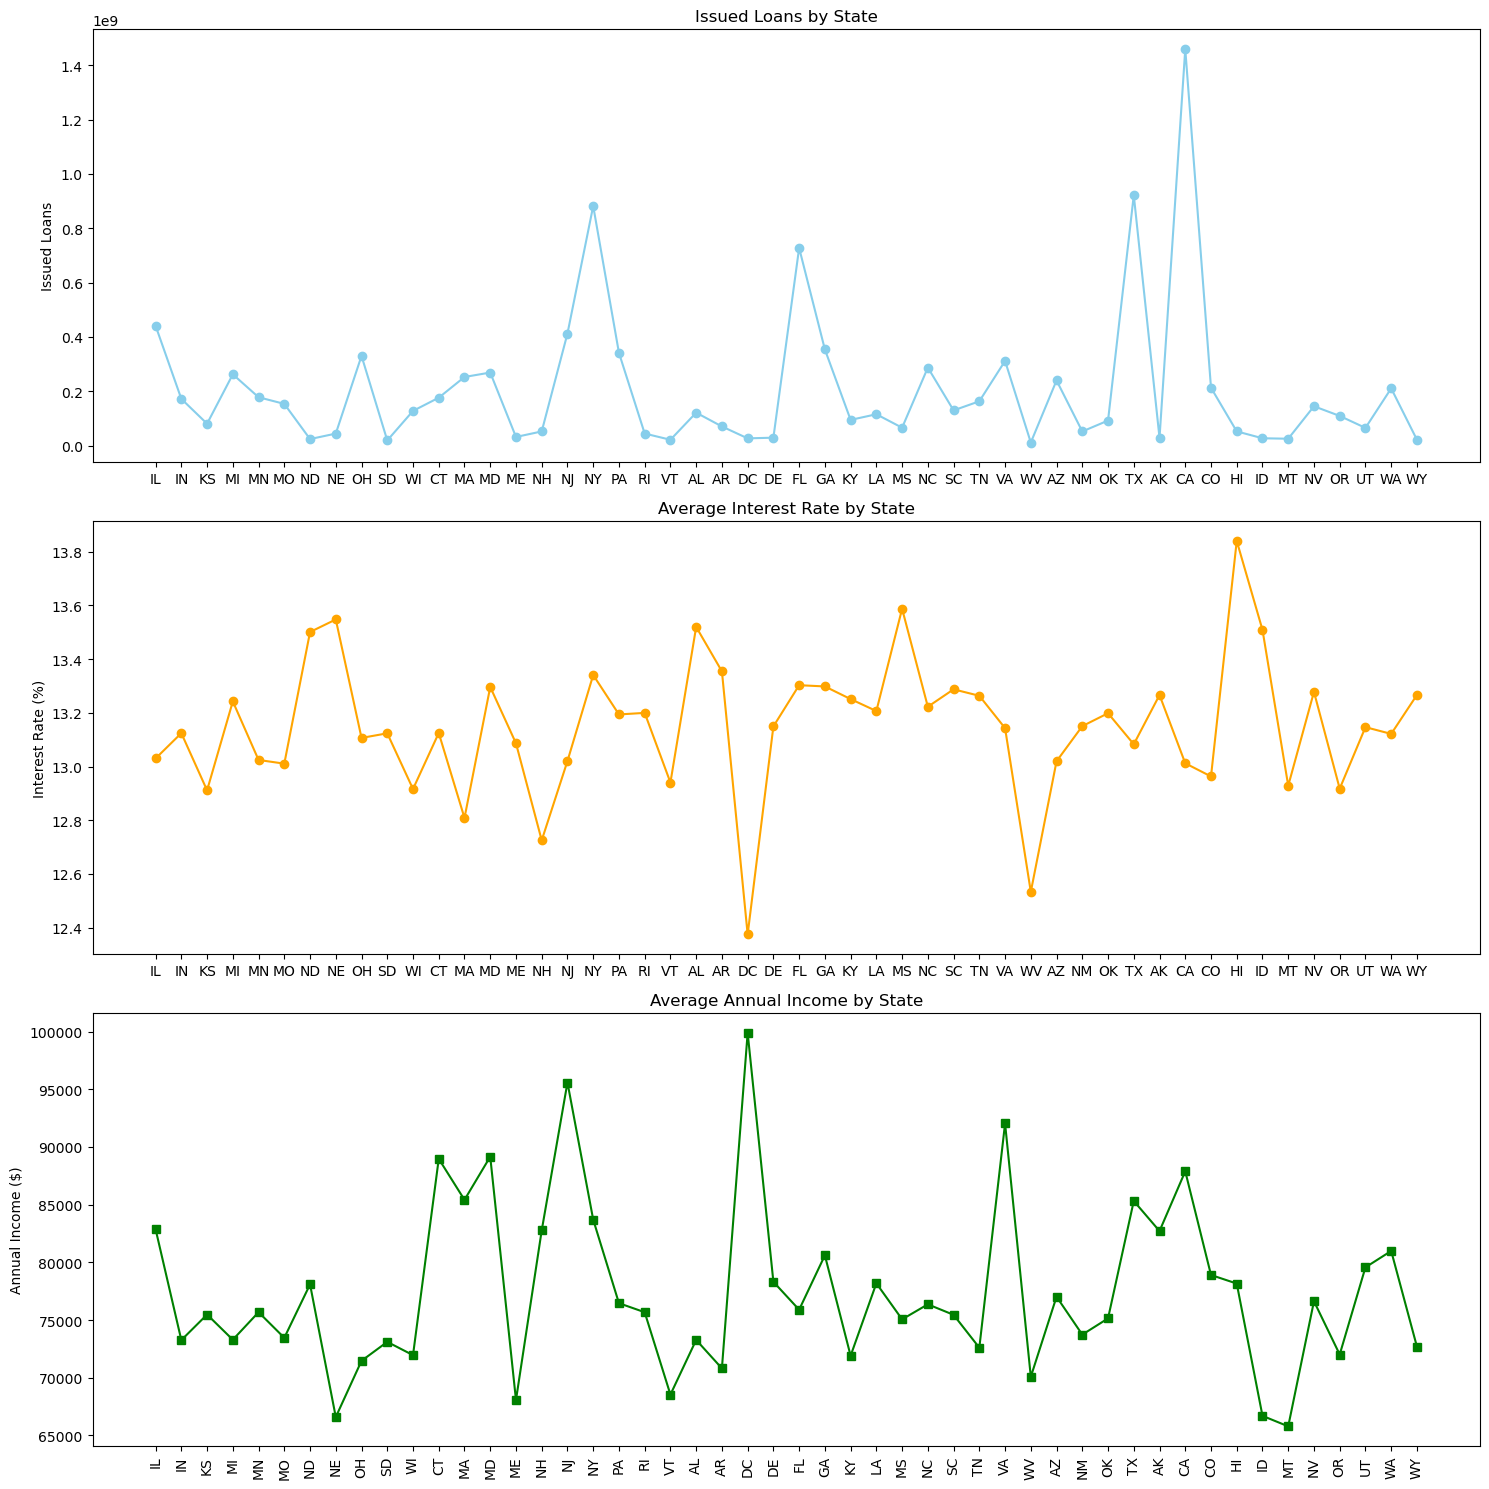

In [15]:
import matplotlib.pyplot as plt

# 서브플롯 생성
fig, axs = plt.subplots(3, 1, figsize=(15, 15))

# 대출액 그래프
axs[0].plot(states, average_loan_amounts, marker = 'o', color='skyblue')
axs[0].set_ylabel('Issued Loans')
axs[0].set_title('Issued Loans by State')

# 이자율 그래프
axs[1].plot(states, average_interest_rates, marker='o', color='orange')
axs[1].set_ylabel('Interest Rate (%)')
axs[1].set_title('Average Interest Rate by State')

# 연간 소득 그래프
axs[2].plot(states, average_annual_income, marker='s', color='green')
axs[2].set_ylabel('Annual Income ($)')
axs[2].set_title('Average Annual Income by State')

# X 축 라벨 회전
plt.xticks(rotation=90)

# 레이아웃 조정
plt.tight_layout()

# 그래프 표시
plt.show()


In [16]:
import folium
import pandas as pd
import requests

# 미국 중심에 지도 생성
map_usa = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# GeoJSON 파일 다운로드
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/us-states.json'
geo_json_data = requests.get(url).json()

# 히트맵 생성
folium.Choropleth(
    geo_data=geo_json_data,
    name='choropleth',
    data=lc_state_df,  # 수정 필요: 데이터프레임 전체를 사용
    columns=['state_codes', 'issued_loans'],
    key_on='feature.id',
    fill_color='RdPu',
    fill_opacity=0.7,
    line_opacity=0.7,
    legend_name='Average Income by State'
).add_to(map_usa)

# 히트맵을 지도에 추가
folium.LayerControl().add_to(map_usa)

# 지도를 HTML 파일로 저장
map_usa.save('income_heatmap.html')

# 지도를 출력
map_usa

In [17]:
import folium
import pandas as pd
import requests

# 미국 중심에 지도 생성
map_usa = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# GeoJSON 파일 다운로드
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/us-states.json'
geo_json_data = requests.get(url).json()

# 히트맵 생성
folium.Choropleth(
    geo_data=geo_json_data,
    name='choropleth',
    data=lc_state_df,  # 수정 필요: 데이터프레임 전체를 사용
    columns=['state_codes', 'interest_rate'],
    key_on='feature.id',
    fill_color='RdPu',
    fill_opacity=0.7,
    line_opacity=0.7,
    legend_name='Average Income by State'
).add_to(map_usa)

# 히트맵을 지도에 추가
folium.LayerControl().add_to(map_usa)

# 지도를 HTML 파일로 저장
map_usa.save('income_heatmap.html')

# 지도를 출력
map_usa

In [18]:
lc_df['region'].value_counts()

region
SouthEast    175895
NorthEast    168994
West         159800
MidWest      131364
SouthWest     88746
Name: count, dtype: int64

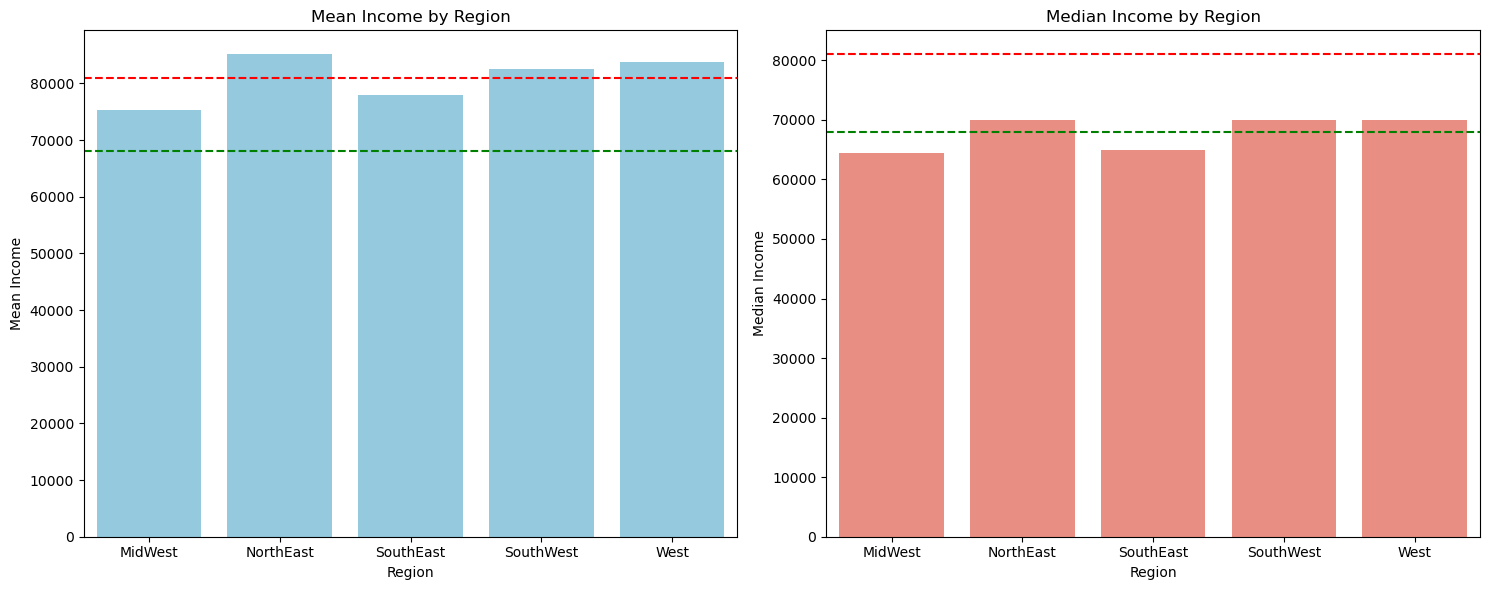

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# 주어진 데이터프레임을 region으로 그룹화하고 각 그룹의 평균과 중위 소득을 계산합니다.
region_mean_median_income = lc_df.groupby('region')['annual_income'].agg(['mean', 'median']).reset_index()

# 전체 annual_income의 평균과 중위 소득 계산
overall_mean_income = lc_df['annual_income'].mean()
overall_median_income = lc_df['annual_income'].median()

# 그래프 생성
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# 평균 소득 막대 그래프 그리기
sns.barplot(x='region', y='mean', data=region_mean_median_income, color='skyblue', ax=axs[0])
axs[0].set_title('Mean Income by Region')
axs[0].set_xlabel('Region')
axs[0].set_ylabel('Mean Income')

# 중위 소득 막대 그래프 그리기
sns.barplot(x='region', y='median', data=region_mean_median_income, color='salmon', ax=axs[1])
axs[1].set_title('Median Income by Region')
axs[1].set_xlabel('Region')
axs[1].set_ylabel('Median Income')

# 전체 annual_income의 평균과 중위 소득을 빨간 점선으로 표시
for ax in axs:
    ax.axhline(y=overall_mean_income, color='r', linestyle='--', label='Overall Mean Income')
    ax.axhline(y=overall_median_income, color='g', linestyle='--', label='Overall Median Income')

# 그래프 간 간격 조정
plt.tight_layout()

# 그래프 표시
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_14280\1367751990.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  lc_df['issue_d'] = pd.to_datetime(lc_df['issue_d'])
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conv

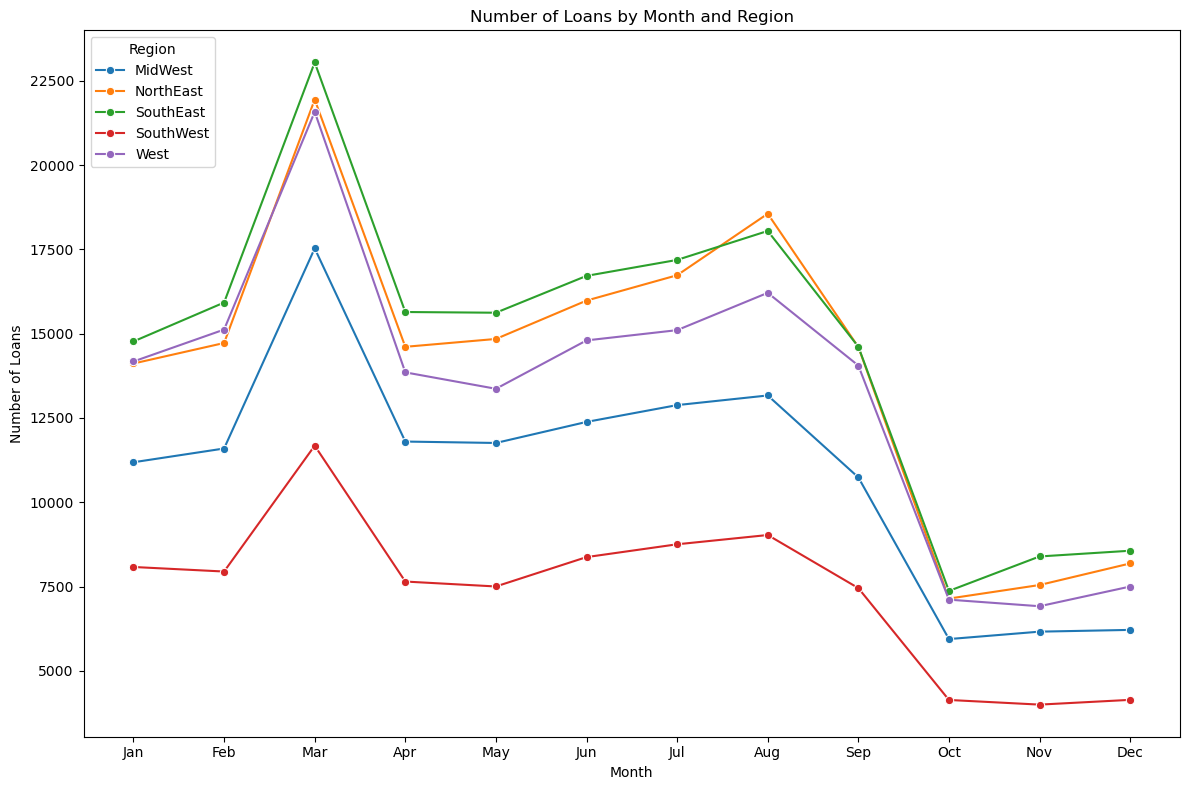

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# issue_d 열을 날짜 형식으로 변환
lc_df['issue_d'] = pd.to_datetime(lc_df['issue_d'])
lc_df['year'] = lc_df['issue_d'].dt.year
# region 및 issue_d 열을 기준으로 그룹화하여 월별 대출 건수 계산
monthly_loan_counts = lc_df.groupby(['region', lc_df['issue_d'].dt.month])['id'].count().unstack()

# 그래프 생성
plt.figure(figsize=(12, 8))

# 각 region 별로 월별 대출 건수를 선 그래프로 표시
for region in monthly_loan_counts.index:
    sns.lineplot(x=monthly_loan_counts.columns, y=monthly_loan_counts.loc[region], marker='o', label=region)

# 그래프 제목 및 축 라벨 설정
plt.title('Number of Loans by Month and Region')
plt.xlabel('Month')
plt.ylabel('Number of Loans')

# 범례 표시
plt.legend(title='Region', loc='upper left')

# 그래프 표시
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()

### 대출 상태 level 나누기

In [21]:
not_paid = ["Charged Off", "Default", "In Grace Period", 
            "Late (16-30 days)", "Late (31-120 days)"]

def loan_condition(status):
    if status in not_paid:
        return 'Troubled Loan'
    else:
        return 'Normal Loan'
    
    
lc_df['loan_condition'] = lc_df['loan_status'].apply(loan_condition)

In [22]:
lc_df['loan_condition'].value_counts()

loan_condition
Normal Loan      663572
Troubled Loan     61227
Name: count, dtype: int64

Text(0, 0.5, '(%)')

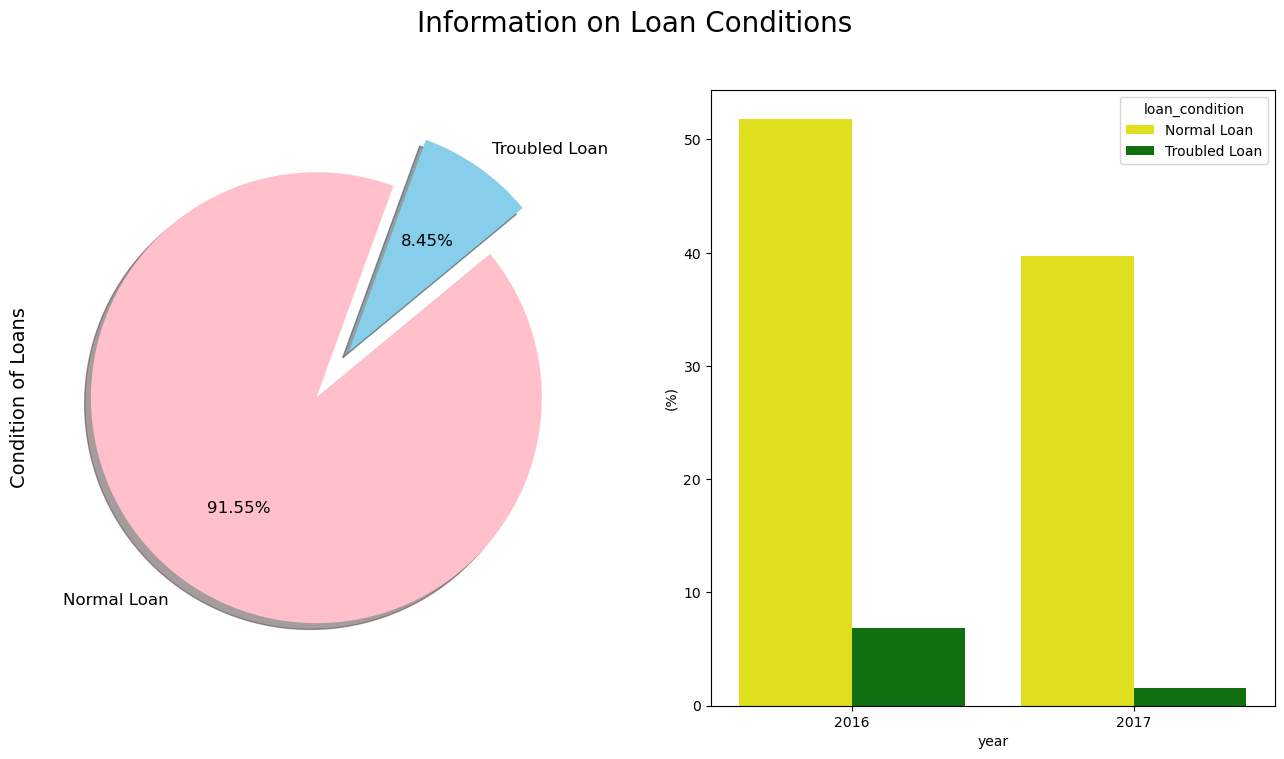

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# 원형 그래프에 사용할 색상과 레이블 정의
colors = ["pink", "skyblue"]
labels = "Normal Loan ", "Troubled Loan"

# 전체 제목 설정
plt.suptitle('Information on Loan Conditions', fontsize=20)

# 첫 번째 서브플롯: 전체 대출상태의 비율 
lc_df["loan_condition"].value_counts().plot.pie(explode=[0, 0.25], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors,
                                             labels=labels, fontsize=12, startangle=70)
ax[0].set_ylabel('Condition of Loans', fontsize=14)  # y축 레이블 설정

# 두 번째 서브플롯: 연도별 대출 상태
palette = ["yellow", "green"]  # 색상 팔레트 정의
sns.barplot(x="year", y="loan_amount", hue="loan_condition", data=lc_df, palette=palette, estimator=lambda x: len(x) / len(lc_df) * 100, ax=ax[1])
ax[1].set_ylabel("(%)")  # y축 레이블 설정


### 각 지역별 문제 대출

In [24]:
tl_df = lc_df.loc[lc_df["loan_condition"] == "Troubled Loan"]

# 각 주별 대출상태 비율 계산
loan_status_cross = pd.crosstab(tl_df['region'], tl_df['loan_status']).apply(lambda x: x/x.sum() * 100)
number_of_loanstatus = pd.crosstab(tl_df['region'], tl_df['loan_status'])


# 소수점 정리
loan_status_cross['Charged Off'] = loan_status_cross['Charged Off'].apply(lambda x: round(x, 2))
loan_status_cross['Default'] = loan_status_cross['Default'].apply(lambda x: round(x, 2))
loan_status_cross['In Grace Period'] = loan_status_cross['In Grace Period'].apply(lambda x: round(x, 2))
loan_status_cross['Late (16-30 days)'] = loan_status_cross['Late (16-30 days)'].apply(lambda x: round(x, 2))
loan_status_cross['Late (31-120 days)'] = loan_status_cross['Late (31-120 days)'].apply(lambda x: round(x, 2))


number_of_loanstatus['Total'] = number_of_loanstatus.sum(axis=1) 
# 문제 대출의 수
number_of_loanstatus

loan_status,Charged Off,Default,In Grace Period,Late (16-30 days),Late (31-120 days),Total
region,,,,,,
MidWest,6399,3,1073,591,2434,10500
NorthEast,8129,9,1638,922,3651,14349
SouthEast,9106,7,1553,922,3592,15180
SouthWest,4651,5,731,447,1841,7675
West,8220,9,1239,814,3241,13523


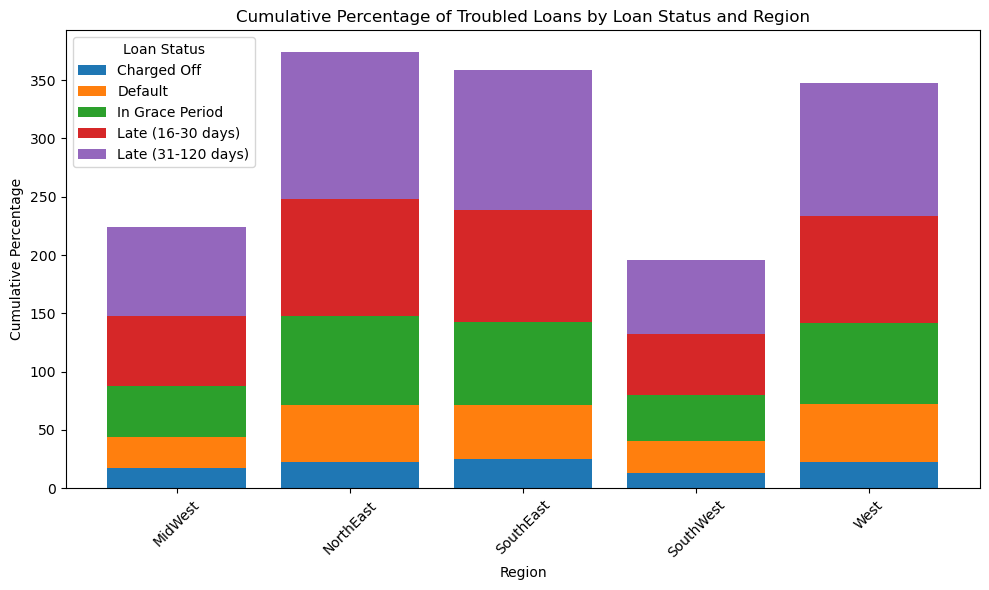

In [25]:
import matplotlib.pyplot as plt

# 누적 그래프 생성
plt.figure(figsize=(10, 6))

# 각 대출 상태에 대한 누적 비율 계산
cumulative_loan_status = loan_status_cross.cumsum(axis=1)

# 누적 바 그래프 생성
bottom = None
for column in cumulative_loan_status.columns:
    if bottom is None:
        plt.bar(cumulative_loan_status.index, cumulative_loan_status[column], label=column)
        bottom = cumulative_loan_status[column]
    else:
        plt.bar(cumulative_loan_status.index, cumulative_loan_status[column], bottom=bottom, label=column)
        bottom += cumulative_loan_status[column]

# 그래프 스타일 및 레이블 설정
plt.title('Cumulative Percentage of Troubled Loans by Loan Status and Region')
plt.xlabel('Region')
plt.ylabel('Cumulative Percentage')
plt.xticks(rotation=45)
plt.legend(title='Loan Status')
plt.grid(False)

# 그래프 표시
plt.tight_layout()
plt.show()


### 소득범위 나누기

In [26]:
# 소득 분위 3분위로 나누기
# 3->2->1
lc_df['income_level'] = pd.qcut(lc_df['annual_income'], q=3, labels=False, duplicates='drop')
lc_df['income_level'] = lc_df['income_level'].apply(lambda x: 3 - x)
lc_df['income_level'] 

0         3
1         1
2         3
3         3
4         2
         ..
759277    3
759281    3
759283    1
759284    3
759290    2
Name: income_level, Length: 724799, dtype: int64

<Axes: xlabel='income_level', ylabel='interest_rate'>

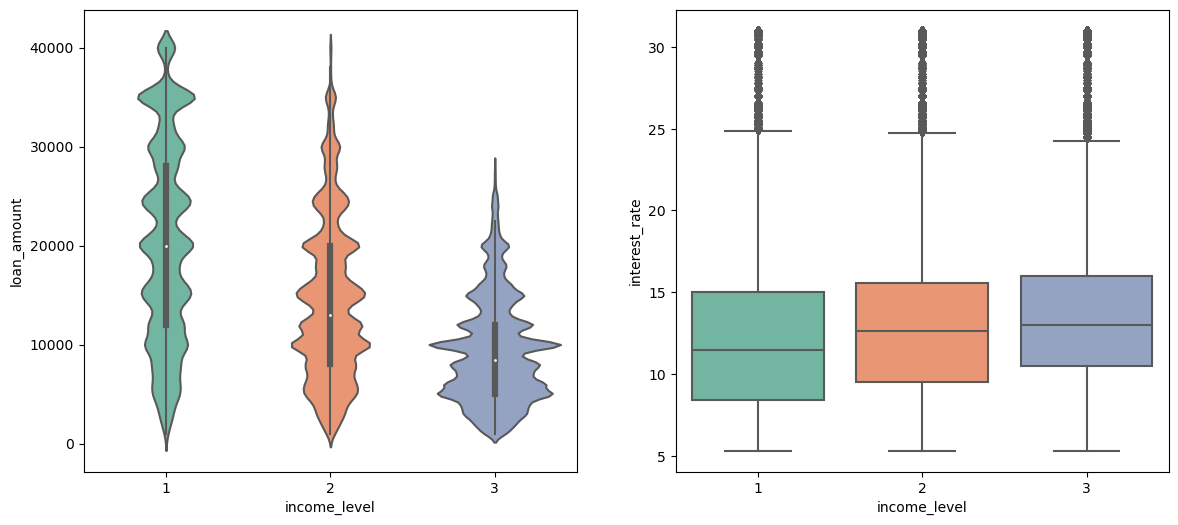

In [27]:
fig, ((ax1, ax2))= plt.subplots(nrows=1, ncols=2, figsize=(14,6))

sns.violinplot(x="income_level", y="loan_amount", data=lc_df, palette="Set2", ax=ax1 )
sns.boxplot(x="income_level", y="interest_rate", data=lc_df, palette="Set2", ax=ax2)

### 소득 분위별 대출의 상태

Text(0.5, 1.0, 'Type of Loans by income_level')

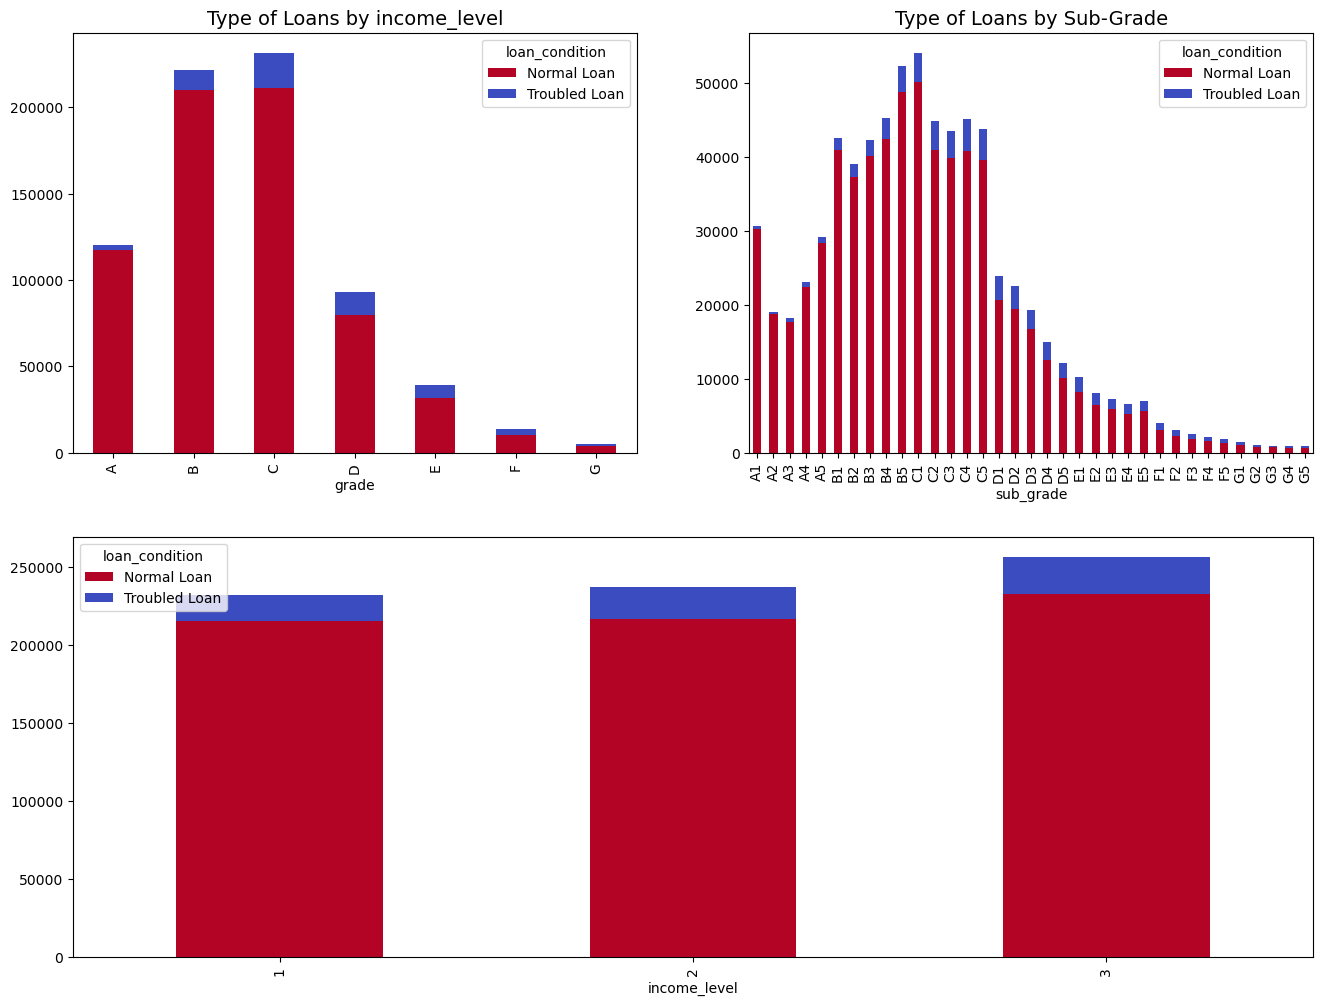

In [28]:
fig = plt.figure(figsize=(16,12))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(212)

cmap = plt.cm.coolwarm_r

loans_by_region = lc_df.groupby(['grade', 'loan_condition']).size()
loans_by_region.unstack().plot(kind='bar', stacked=True, colormap=cmap, ax=ax1, grid=False)
ax1.set_title('Type of Loans by Grade', fontsize=14)


loans_by_grade = lc_df.groupby(['sub_grade', 'loan_condition']).size()
loans_by_grade.unstack().plot(kind='bar', stacked=True, colormap=cmap, ax=ax2, grid=False)
ax2.set_title('Type of Loans by Sub-Grade', fontsize=14)

loans_by_income_level = lc_df.groupby(['income_level', 'loan_condition']).size()
loans_by_income_level.unstack().plot(kind='bar', stacked=True, colormap=cmap, ax=ax3, grid=False)
ax1.set_title('Type of Loans by income_level', fontsize=14)


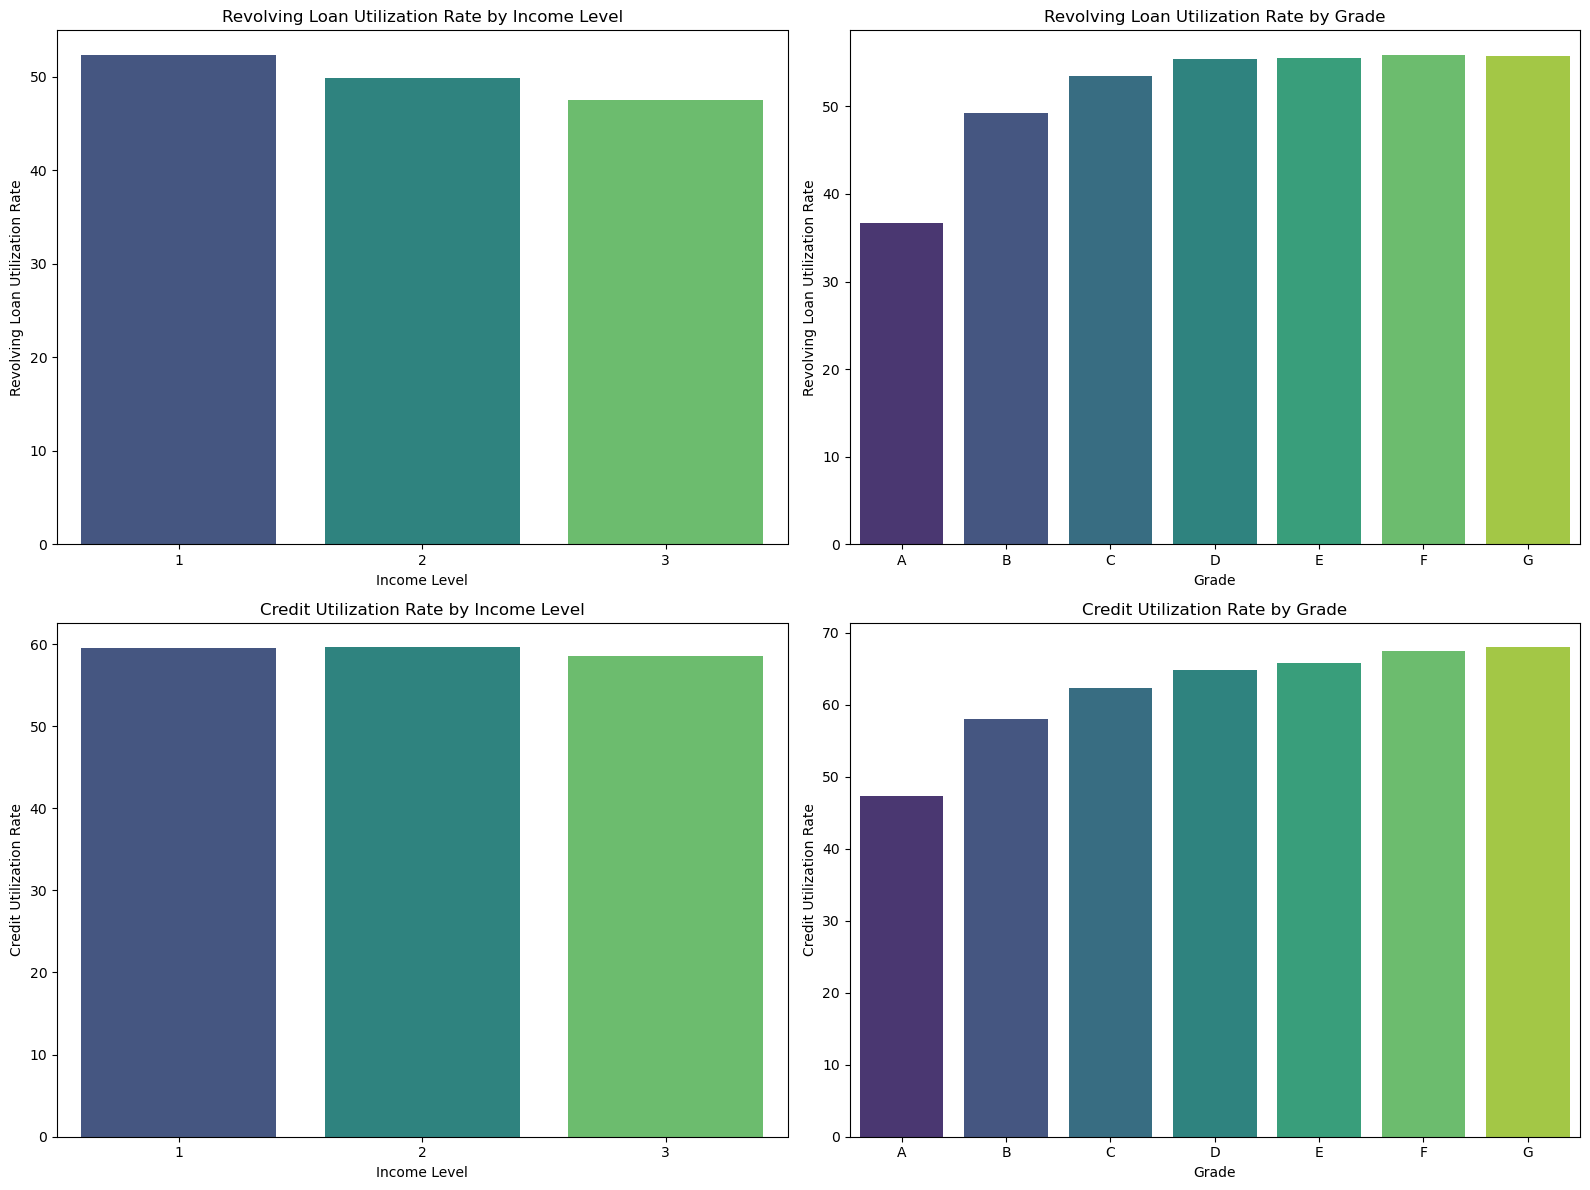

In [29]:
# 그래프에 사용할 데이터프레임들
data_frames = [
    (lc_df.groupby(['income_level'])[['revol_util']].mean(), 'Revolving Loan Utilization Rate by Income Level', 'Income Level', 'Revolving Loan Utilization Rate'),
    (lc_df.groupby(['grade'])[['revol_util']].mean(), 'Revolving Loan Utilization Rate by Grade', 'Grade', 'Revolving Loan Utilization Rate'),
    (lc_df.groupby(['income_level'])[['all_util']].mean(), 'Credit Utilization Rate by Income Level', 'Income Level', 'Credit Utilization Rate'),
    (lc_df.groupby(['grade'])[['all_util']].mean(), 'Credit Utilization Rate by Grade', 'Grade', 'Credit Utilization Rate')
]

# 그래프를 그릴 서브플롯 인덱스
subplot_indices = [(0, 0), (0, 1), (1, 0), (1, 1)]

# 그래프 시각화
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
for (df, title, xlabel, ylabel), (i, j) in zip(data_frames, subplot_indices):
    sns.barplot(data=df.reset_index(), x=df.index, y=df.columns[0], palette='viridis', ax=axes[i, j])
    axes[i, j].set_title(title)
    axes[i, j].set_xlabel(xlabel)
    axes[i, j].set_ylabel(ylabel)

plt.tight_layout()
plt.show()


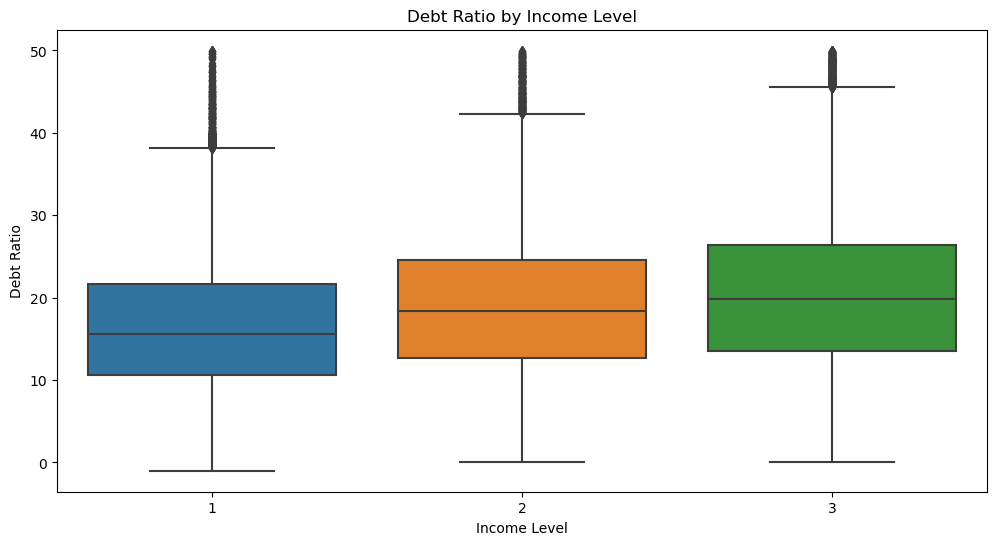

In [30]:
# 소득 구간 별 부채 비율 시각화 (상자 그림)
plt.figure(figsize=(12, 6))
sns.boxplot(data=lc_df, x='income_level', y='dti')
plt.title('Debt Ratio by Income Level')
plt.xlabel('Income Level')
plt.ylabel('Debt Ratio')
plt.show()

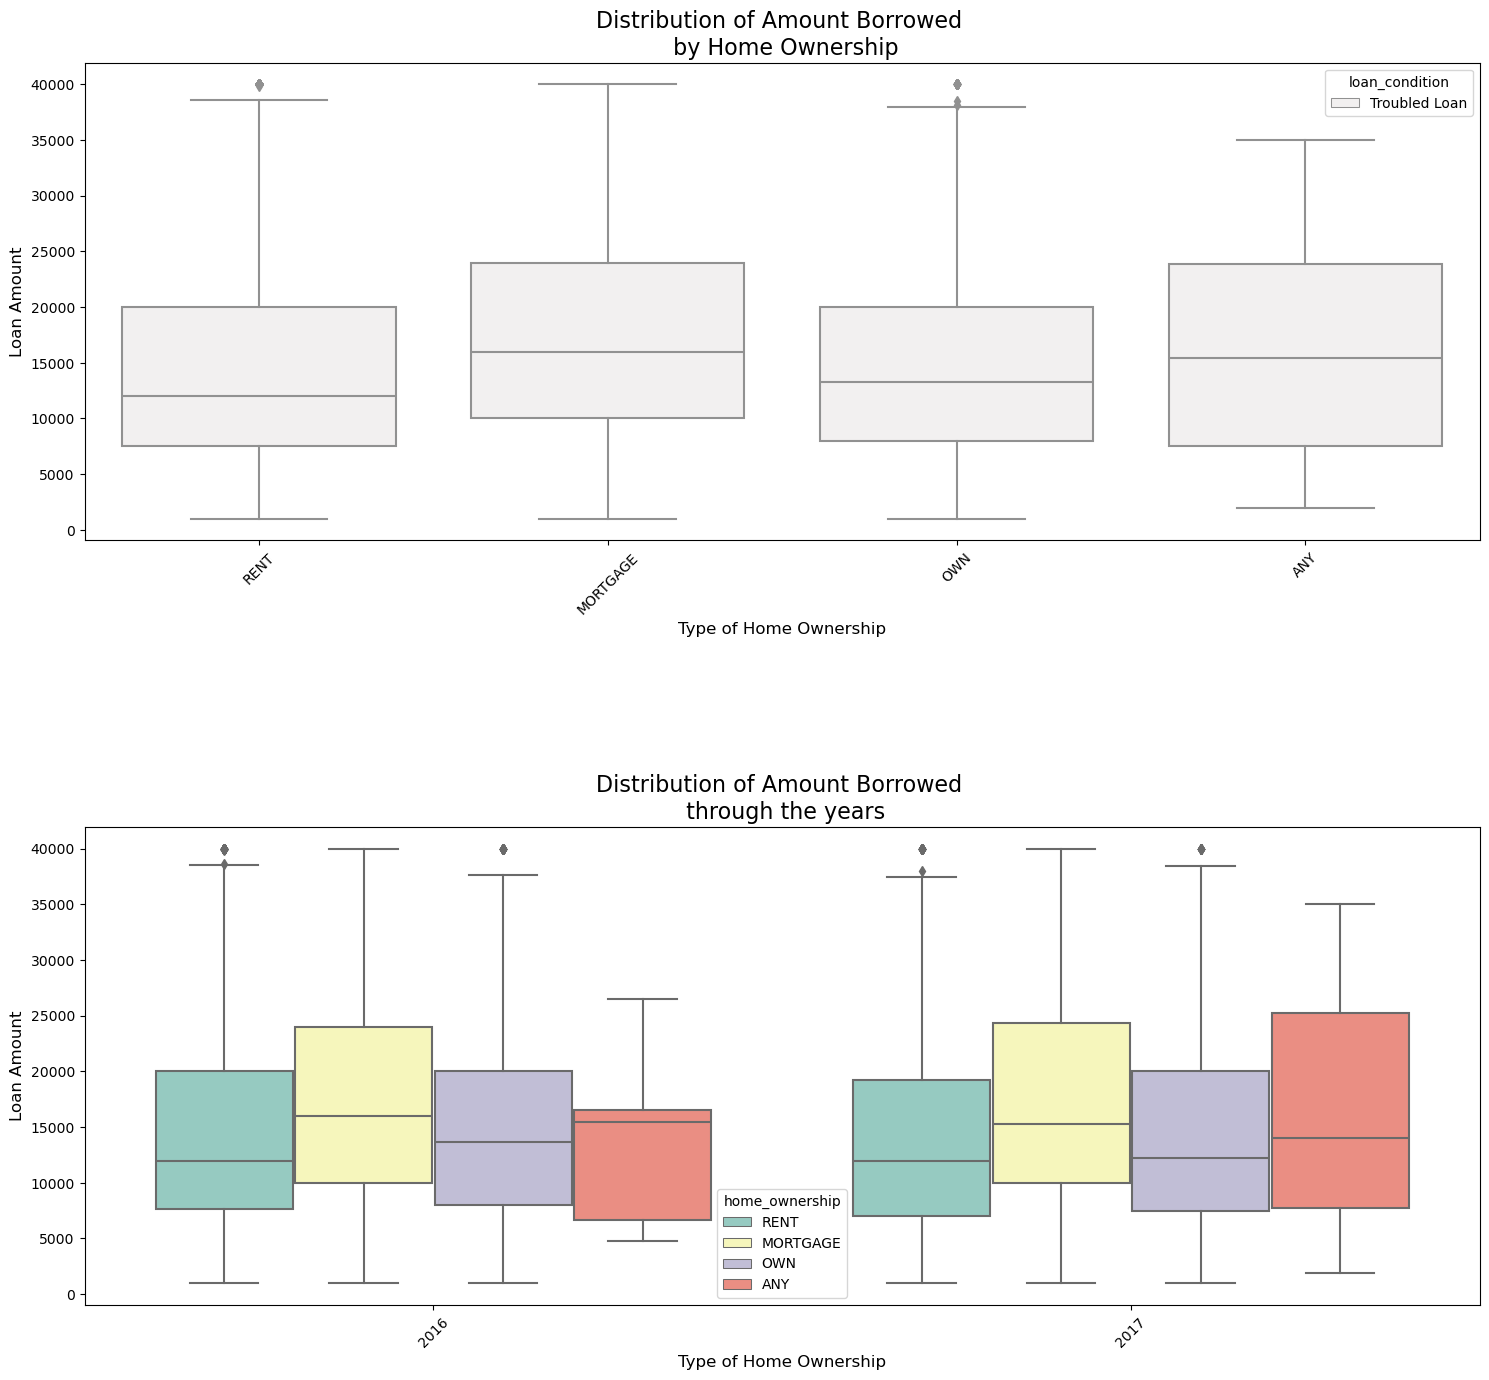

In [31]:
import seaborn as sns

plt.figure(figsize=(18,18))

# Create a dataframe for bad loans
bad_df = lc_df.loc[lc_df['loan_condition'] == 'Troubled Loan']

plt.subplot(211)
g = sns.boxplot(x='home_ownership', y='loan_amount', hue='loan_condition',
               data=bad_df, color='r')

g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("Type of Home Ownership", fontsize=12)
g.set_ylabel("Loan Amount", fontsize=12)
g.set_title("Distribution of Amount Borrowed \n by Home Ownership", fontsize=16)



plt.subplot(212)
g1 = sns.boxplot(x='year', y='loan_amount', hue='home_ownership',
               data=bad_df, palette="Set3")
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)
g1.set_xlabel("Type of Home Ownership", fontsize=12)
g1.set_ylabel("Loan Amount", fontsize=12)
g1.set_title("Distribution of Amount Borrowed \n through the years", fontsize=16)


plt.subplots_adjust(hspace = 0.6, top = 0.8)

plt.show()

In [32]:
# 주택 소유 형태를 각 분위 별로 빈도 계산 (ANY 제외)
home_ownership_by_income = lc_df.groupby('income_level')['home_ownership'].value_counts(normalize=True).unstack()
home_ownership_by_income

home_ownership,ANY,MORTGAGE,NONE,OWN,RENT
income_level,,,,,
1,0.000838,0.623133,0.000004,0.104808,0.271217
2,0.000595,0.506504,NaN,0.111378,0.381523
3,0.000652,0.327131,NaN,0.143364,0.528854


<Figure size 1200x800 with 0 Axes>

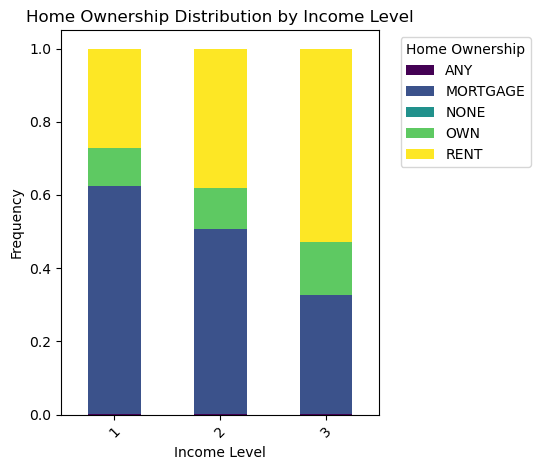

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# 바 그래프로 시각화
plt.figure(figsize=(12, 8))
home_ownership_by_income.plot(kind='bar', stacked=True, cmap='viridis')
plt.title('Home Ownership Distribution by Income Level')
plt.xlabel('Income Level')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Home Ownership', bbox_to_anchor=(1.5, 1), loc='upper right')
plt.tight_layout()
plt.show()


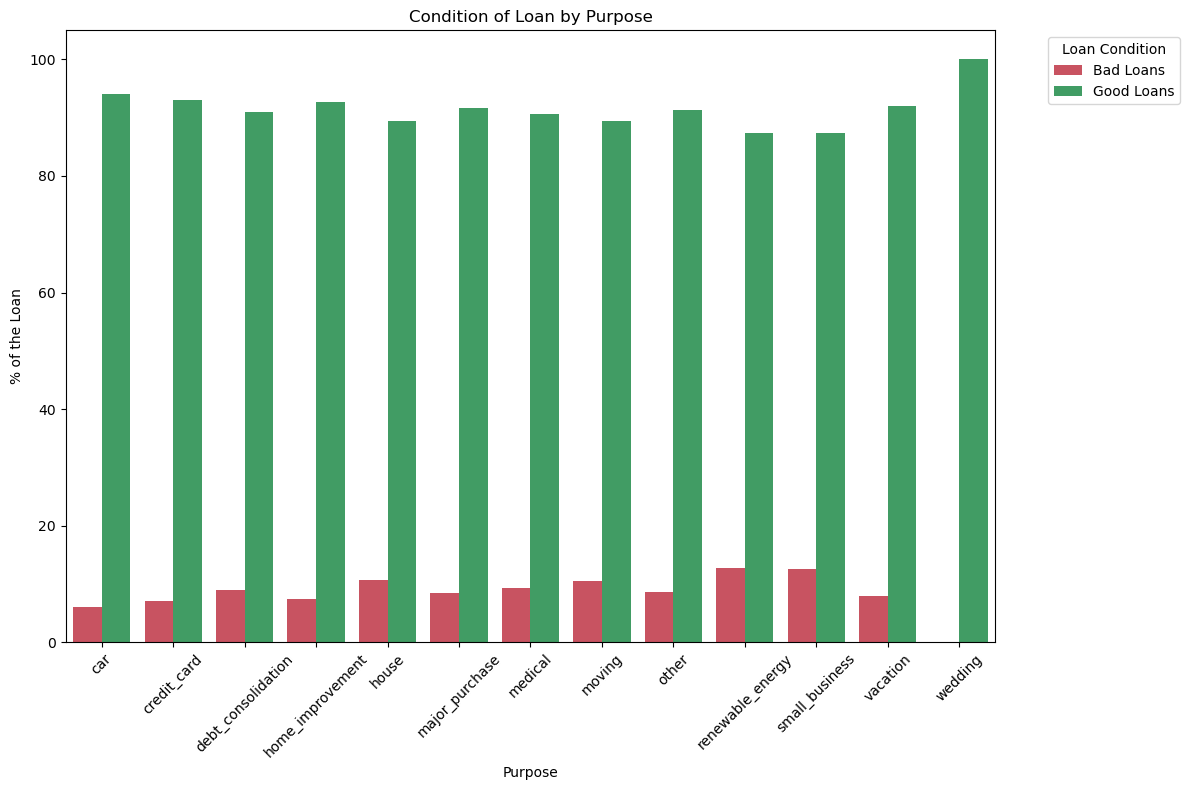

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터프레임에서 대출 목적별 대출 상태 비율 계산
purpose_condition = round(pd.crosstab(lc_df['loan_condition'], lc_df['purpose']).apply(lambda x: x/x.sum() * 100), 2)

# Bad Loans와 Good Loans를 구분하여 데이터 추출
bad_loans = purpose_condition.loc['Troubled Loan']
good_loans = purpose_condition.loc['Normal Loan']
purposes = purpose_condition.columns

# 데이터프레임 재구성
purpose_df = pd.DataFrame({'Purpose': purposes, 'Bad Loans': bad_loans, 'Good Loans': good_loans})

# 데이터프레임을 'Purpose' 열을 기준으로 재구성하여 seaborn에 적합한 형태로 변환
purpose_df = purpose_df.melt(id_vars='Purpose', var_name='Loan Condition', value_name='% of the Loan')

# 시각화
plt.figure(figsize=(12, 8))
sns.barplot(x='Purpose', y='% of the Loan', hue='Loan Condition', data=purpose_df, palette=['#DB4052', '#32AB60'])
plt.title('Condition of Loan by Purpose')
plt.xlabel('Purpose')
plt.ylabel('% of the Loan')
plt.xticks(rotation=45)
plt.legend(title='Loan Condition', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


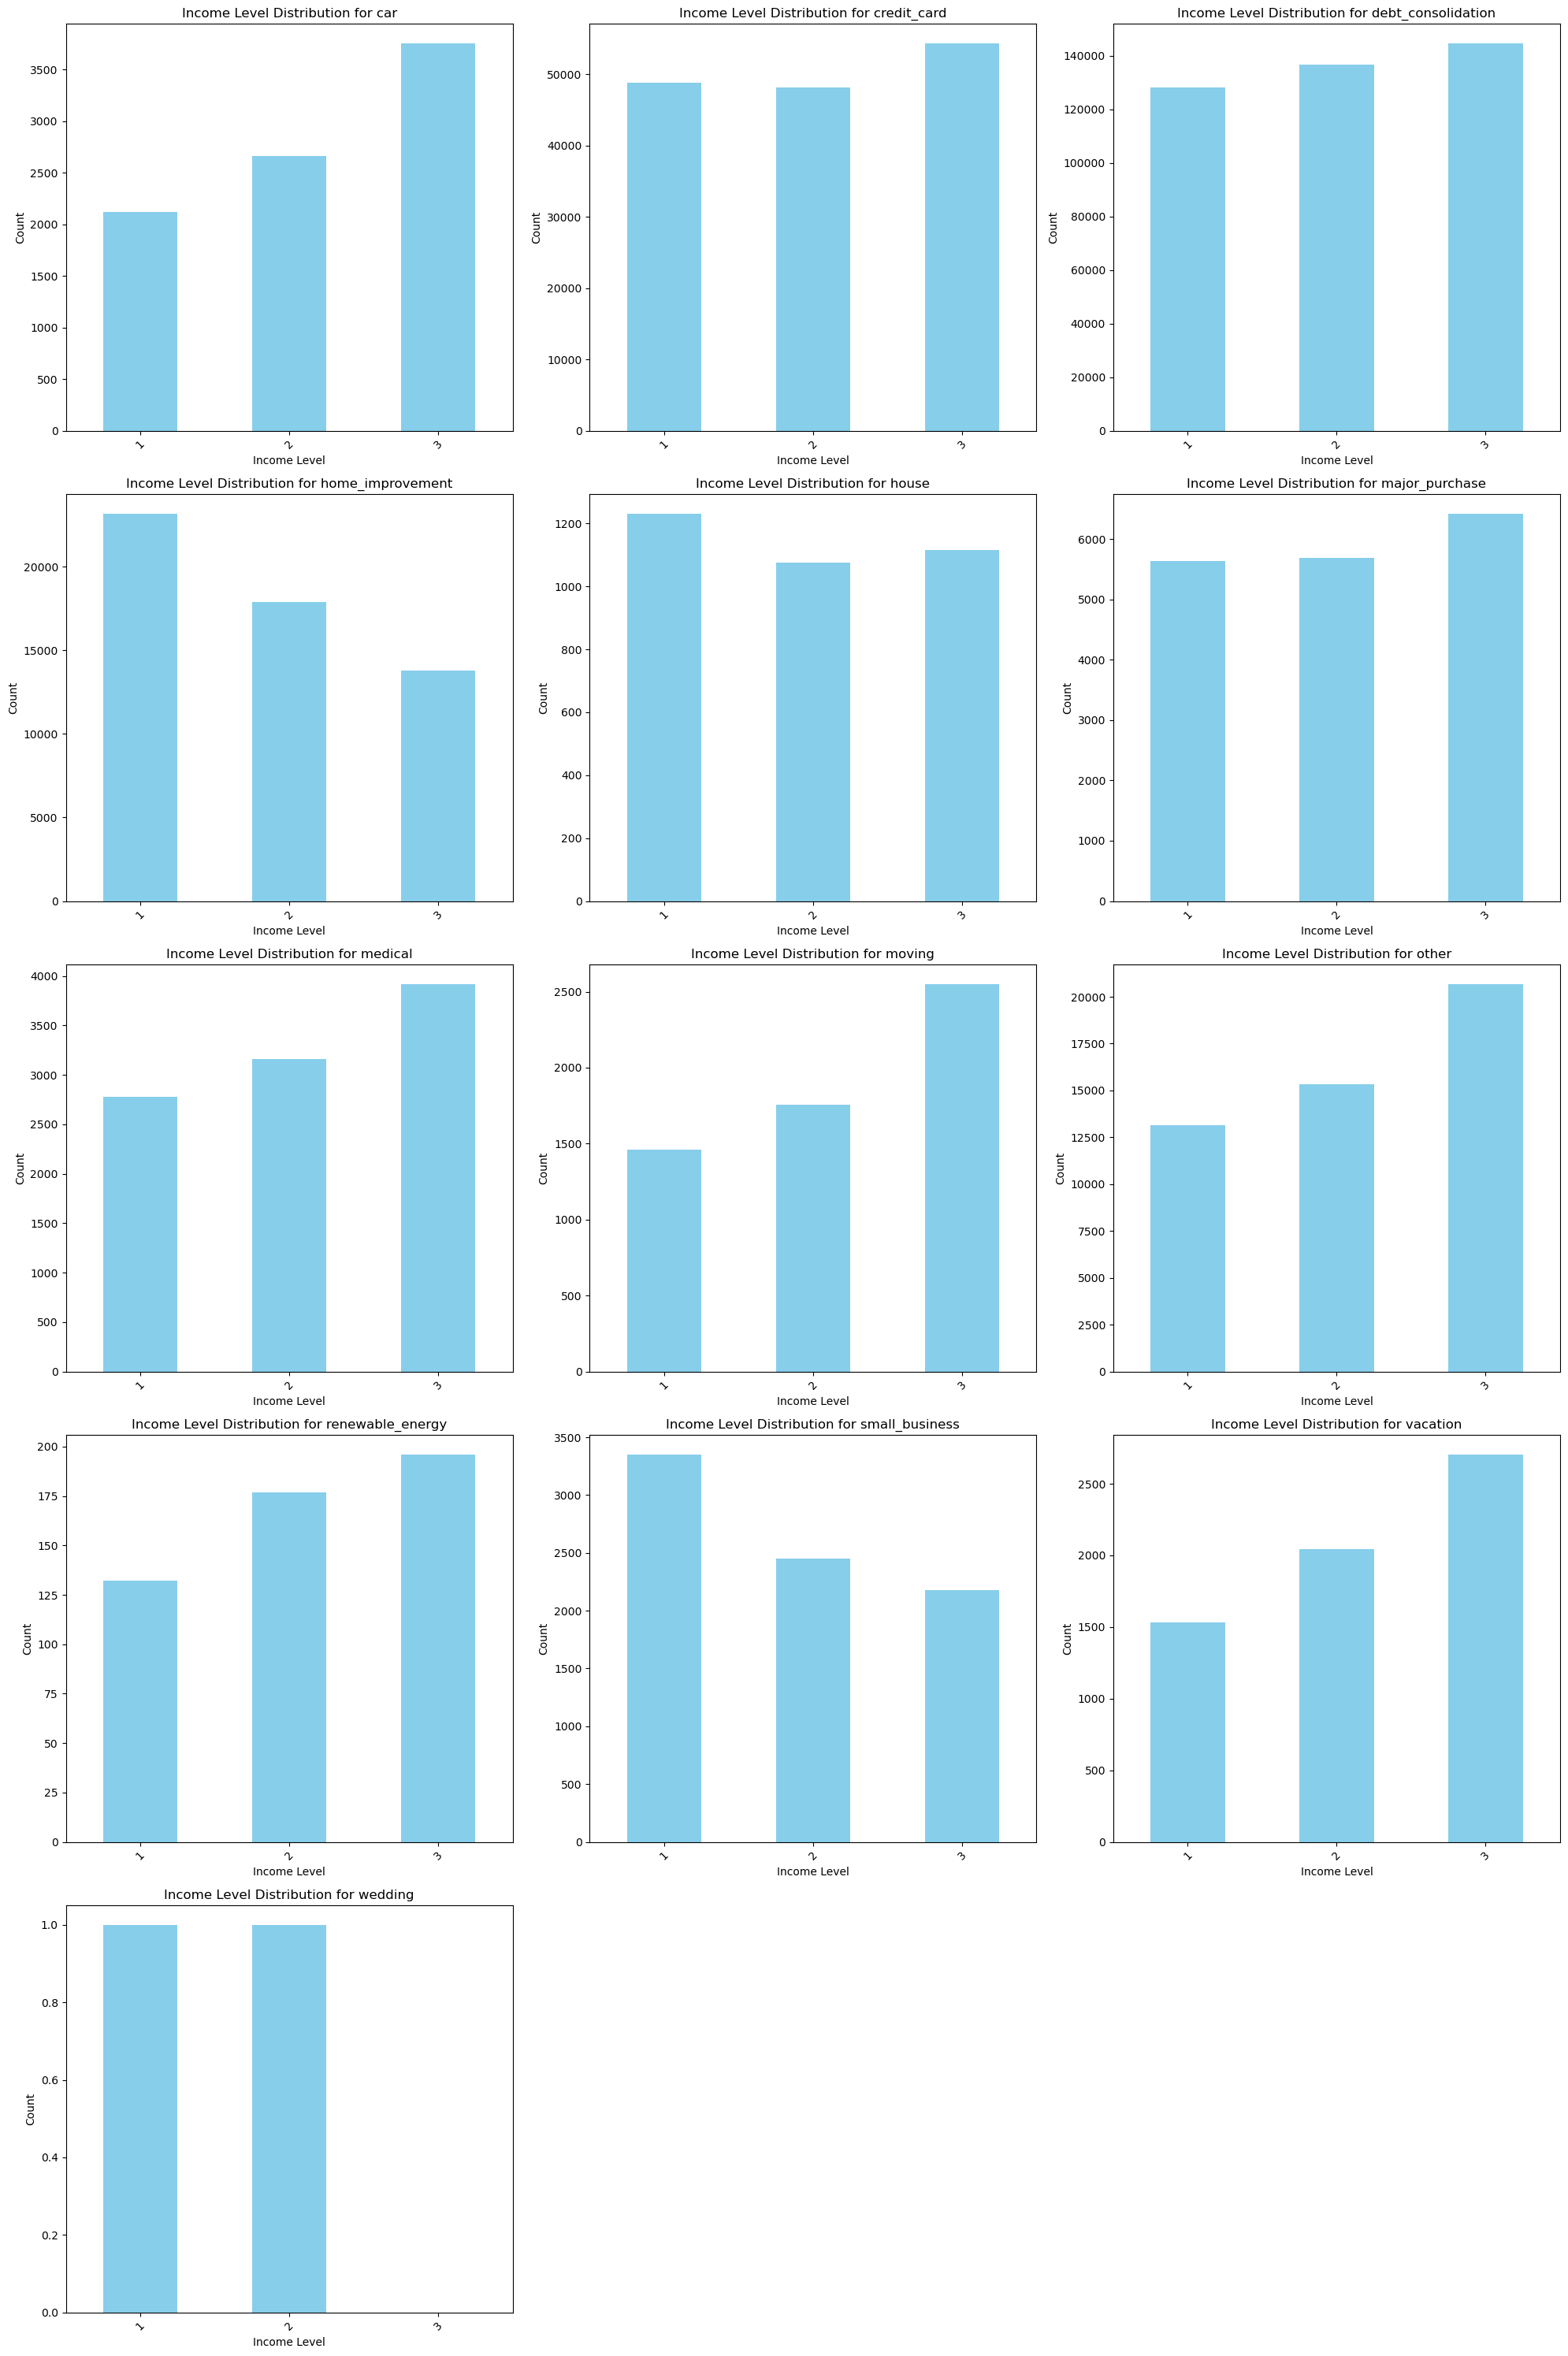

In [95]:
# 대출 유형(purpose)을 소득 구간 별로 카운트
loan_purpose_by_income = lc_df.groupby(['purpose', 'income_level']).size().unstack(fill_value=0)


# 막대 그래프로 시각화
plt.figure(figsize=(20, 30))

# 각 대출 용도별로 막대 그래프 그리기
for i, purpose in enumerate(loan_purpose_by_income.index, 1):
    plt.subplot(5, 3, i)
    income_counts = loan_purpose_by_income.loc[purpose]
    income_counts.plot(kind='bar', color='skyblue')
    plt.title(f'Income Level Distribution for {purpose}')
    plt.xlabel('Income Level')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()
